In [1]:
import numpy as np
import scipy

import cupy as cp
import cupyx.scipy

import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # just making the notebook cells wider

from importlib import reload
import time

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import wfsc_tests as wfsc
wfsc.math_module.update_np(cp)
wfsc.math_module.update_scipy(cupyx.scipy)

from wfsc_tests.math_module import xp, _scipy

import cgi_phasec_poppy as cgi
reload(cgi)

from matplotlib.colors import ListedColormap
#Blue to Red Color scale for S1 and S2
colmap = np.zeros((255,3));
# Red
colmap[126:183,0]= np.linspace(0,1,57);
colmap[183:255,0]= 1;
# Green
colmap[0:96,1] = np.linspace(1,0,96);
colmap[158:255,1]= np.linspace(0,1,97);
# Blue
colmap[0:71,2] = 1;
colmap[71:128,2]= np.linspace(1,0,57);
colmap2 = colmap[128:,:]
colmap = ListedColormap(colmap)

# iefc_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data')
iefc_dir = Path('/home/kianmilani/Projects/roman-cgi-iefc-data')

dm1_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
dm2_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
!nvidia-smi

Thu Jun 29 11:22:44 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   37C    P0               76W / 300W|   2231MiB / 81920MiB |     21%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [7]:
from datetime import datetime
date = int(datetime.today().strftime('%Y%m%d'))
date

In [12]:
date = 20230624
weight_map = xp.array(fits.getdata(iefc_dir/'response-data'/f'hlc_iefc_2dm_weight_map_{date}.fits'))
control_mask = weight_map>0
wfsc.imshow2(weight_map, control_mask)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kianmilani/Projects/roman-cgi-iefc-data/response-data/hlc_iefc_2dm_weight_map_20230624.fits'

Calibrations 1/3


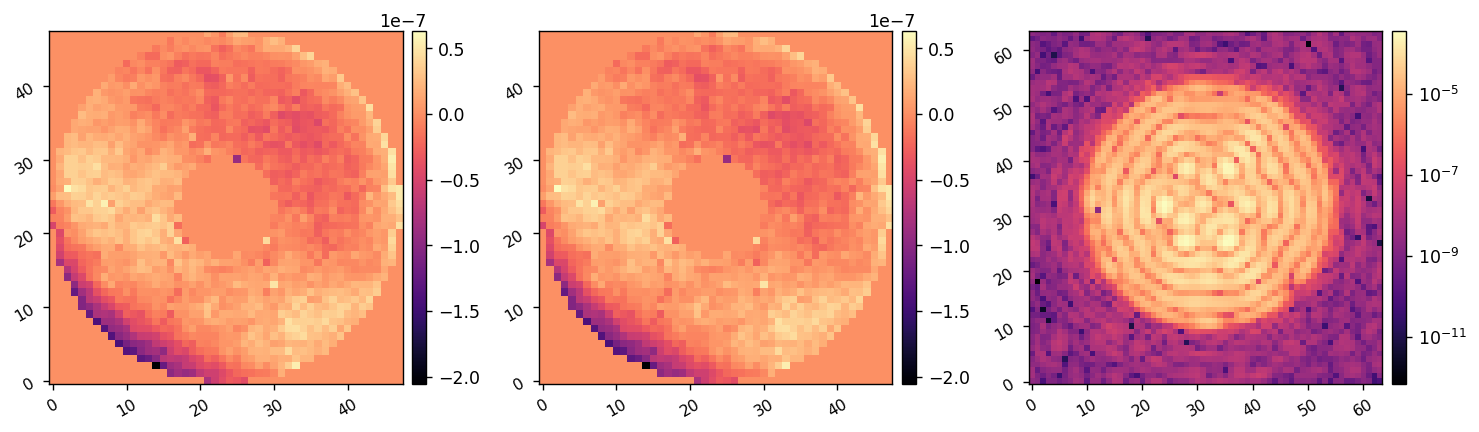

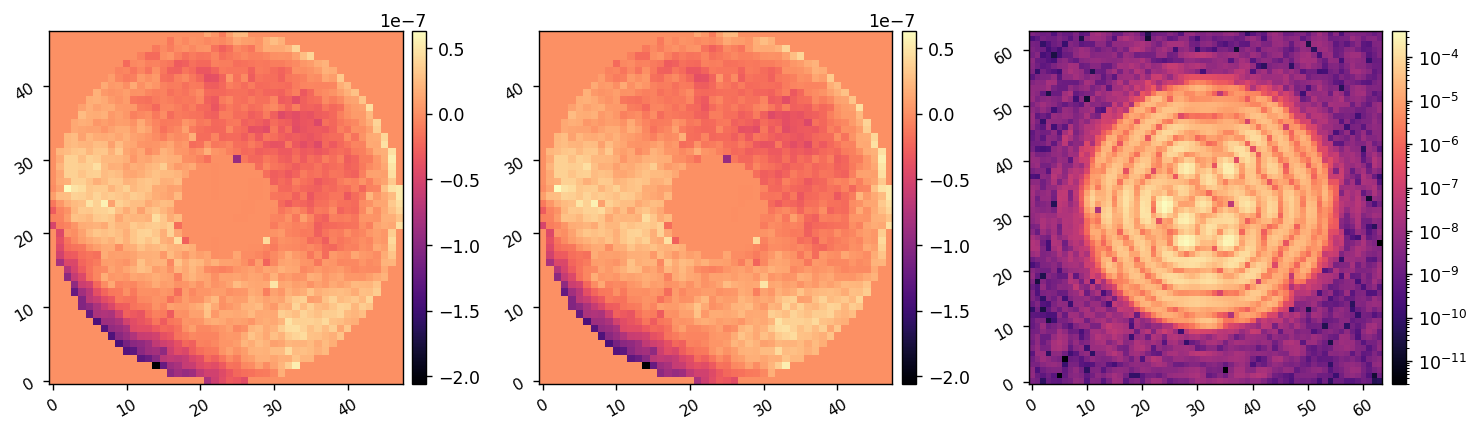

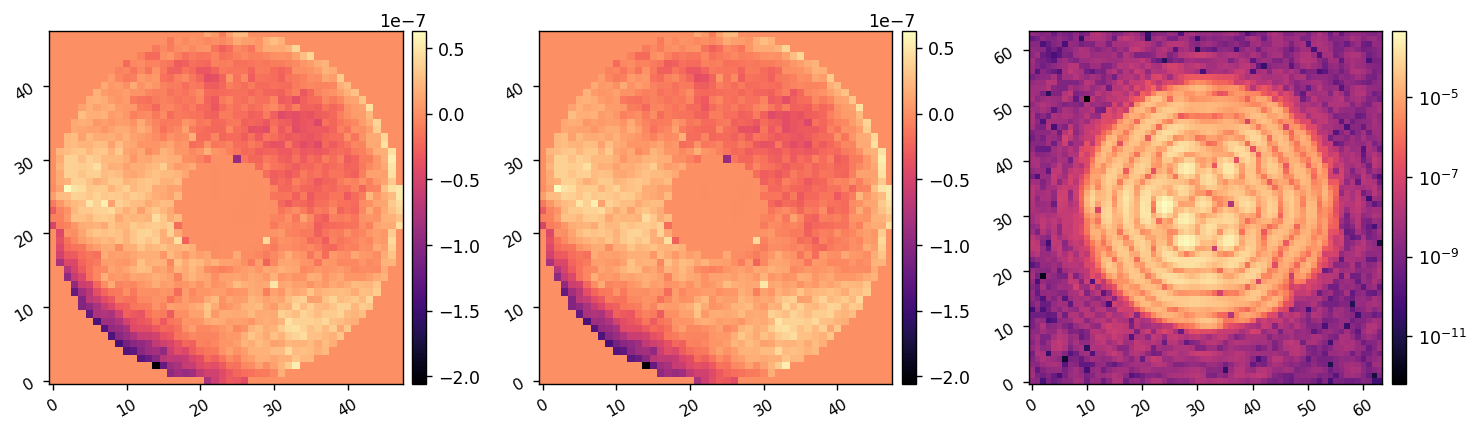

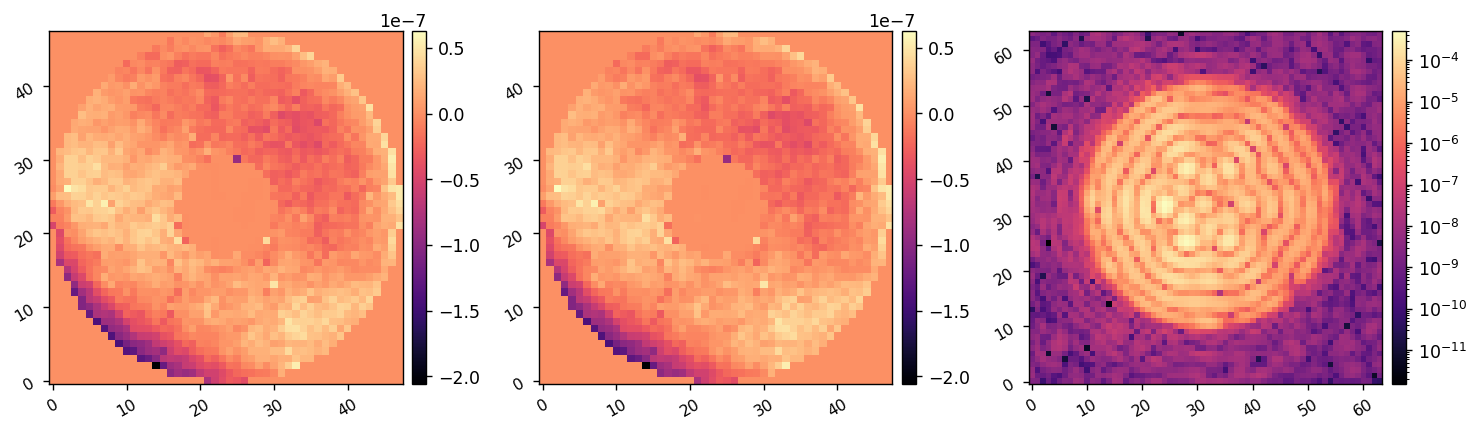

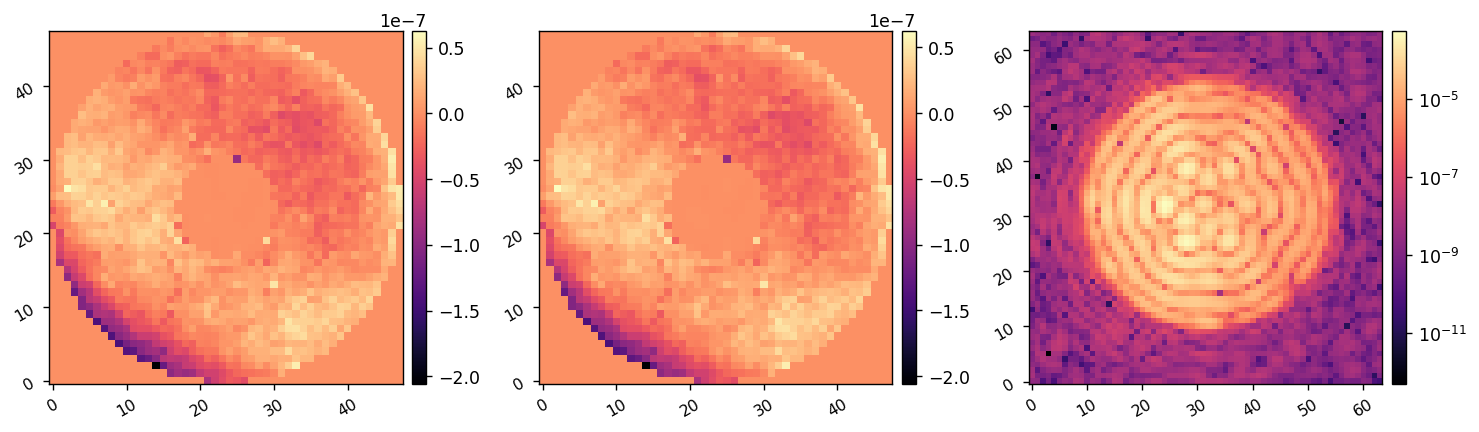

Calibrations 2/3


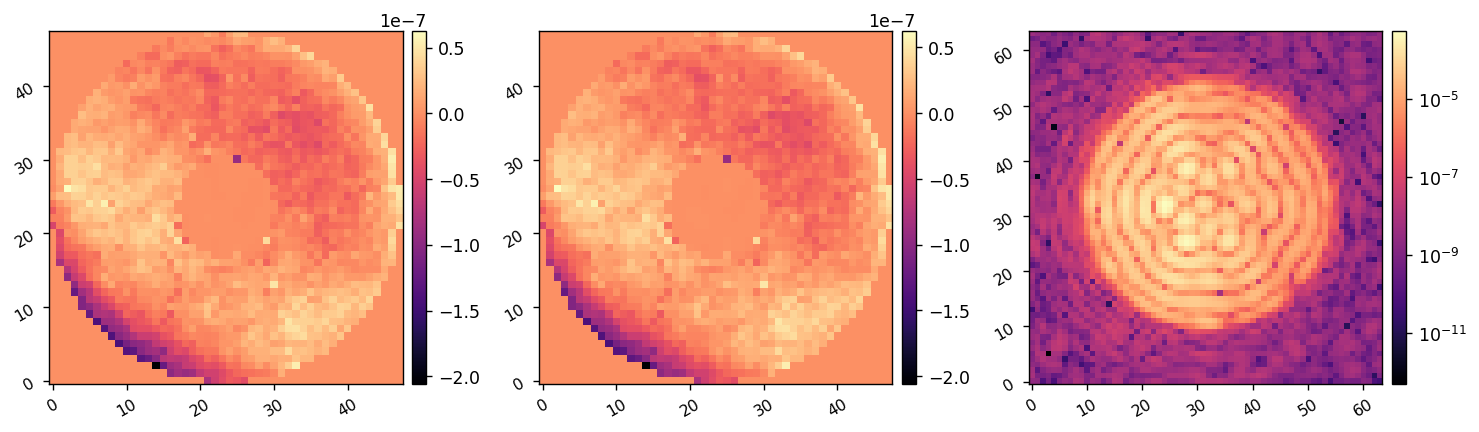

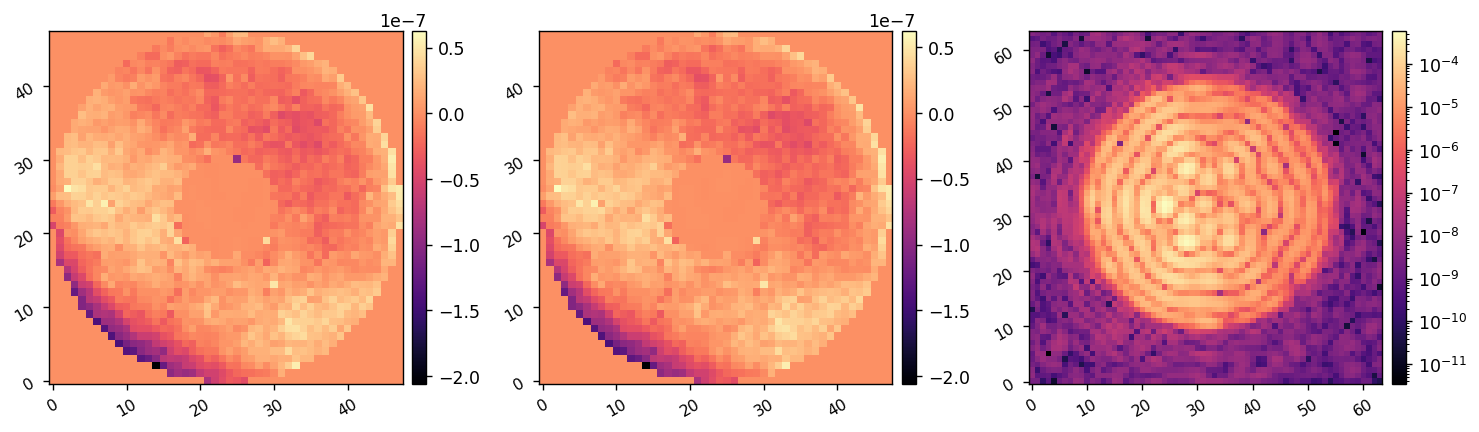

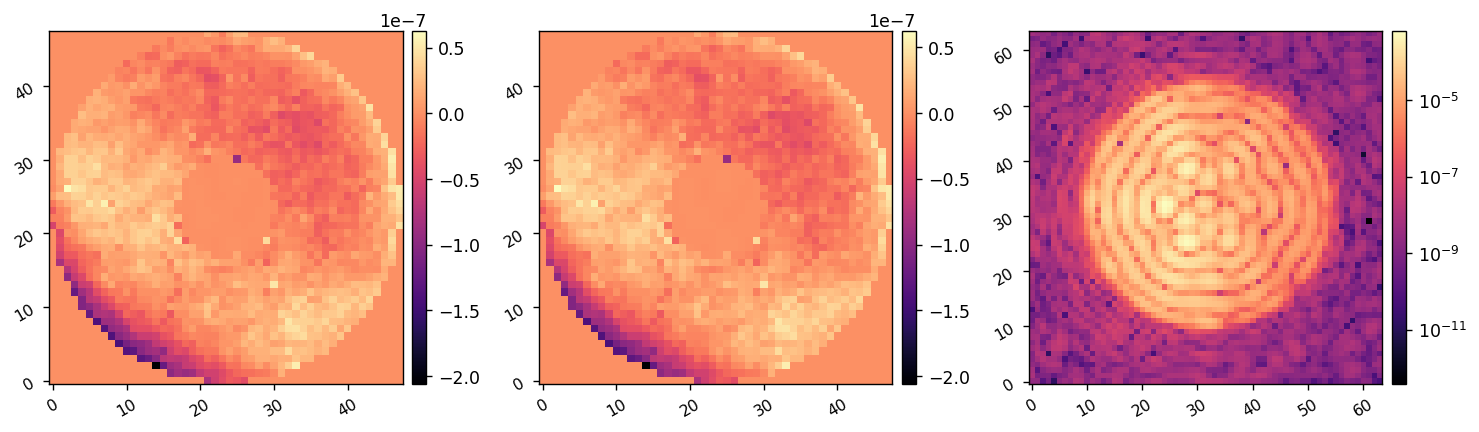

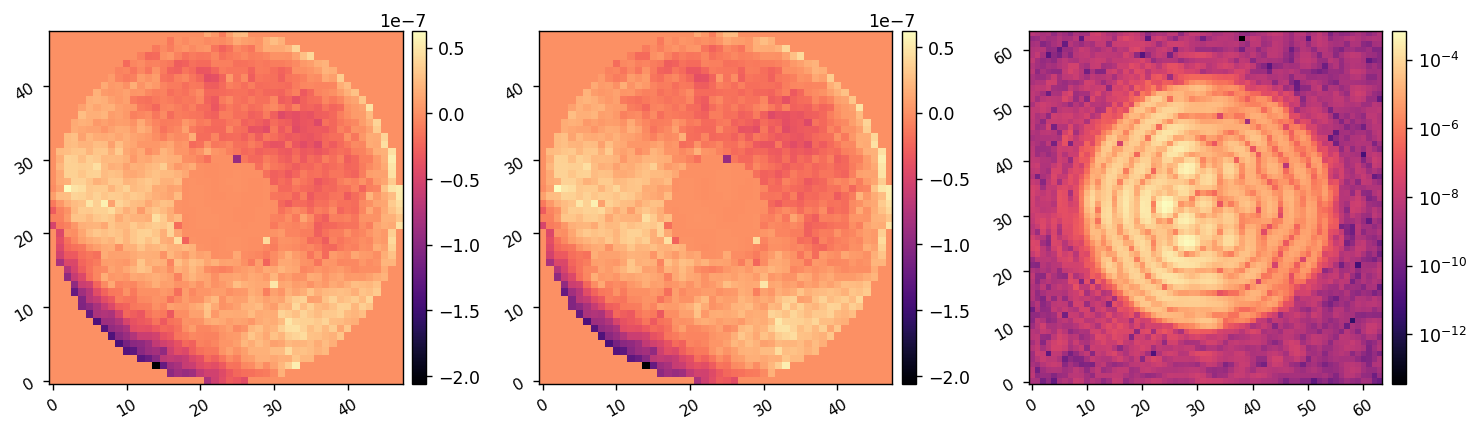

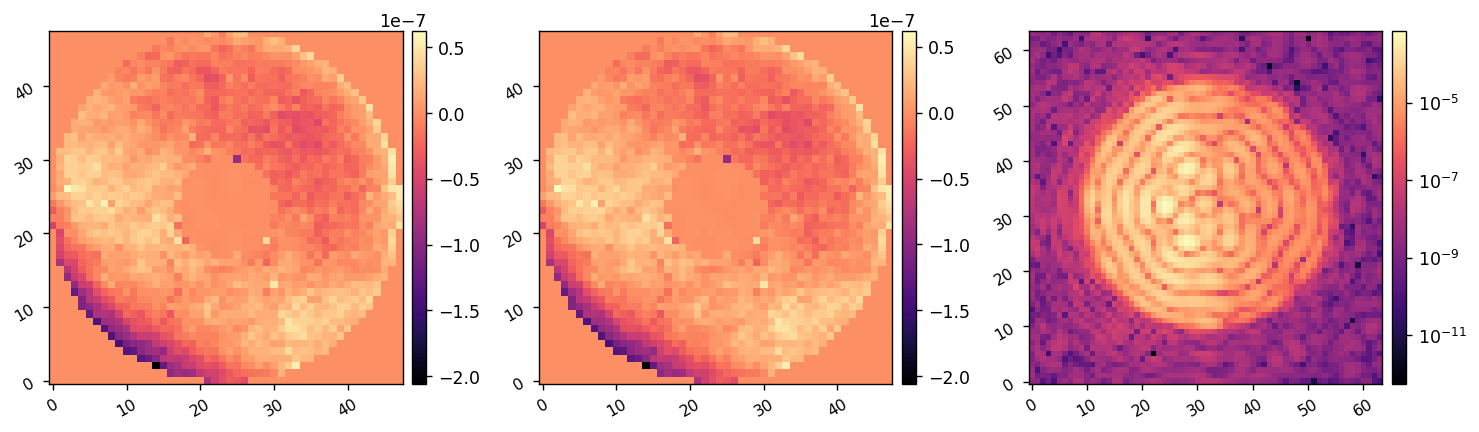

Calibrations 3/3


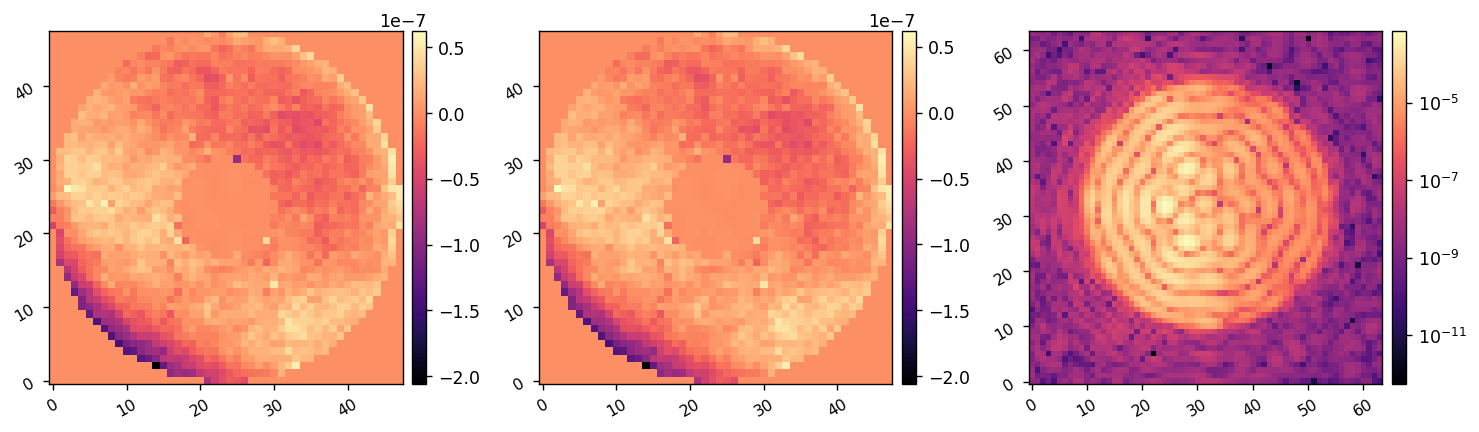

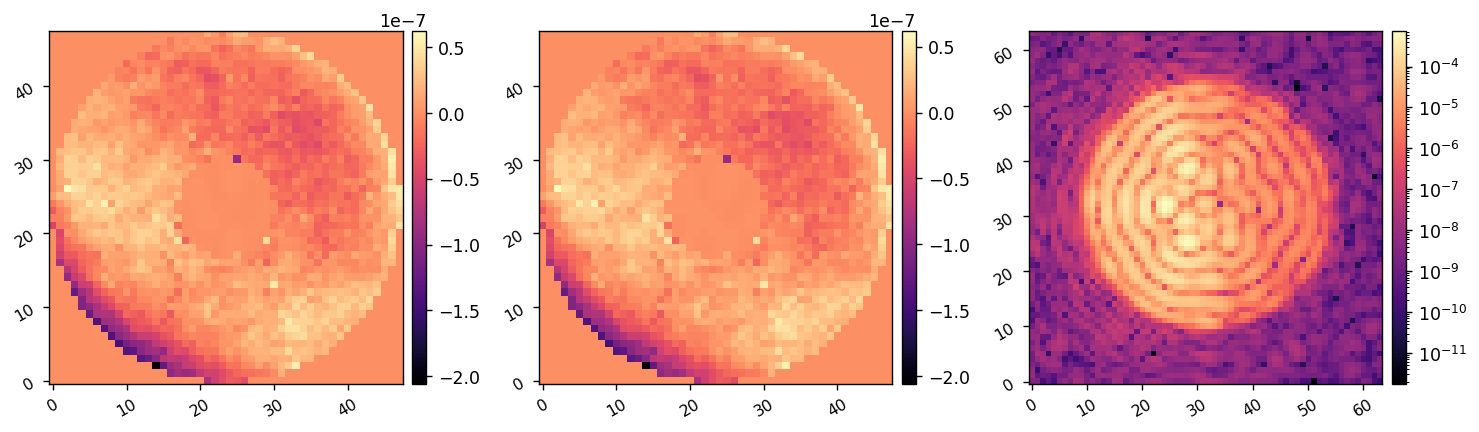

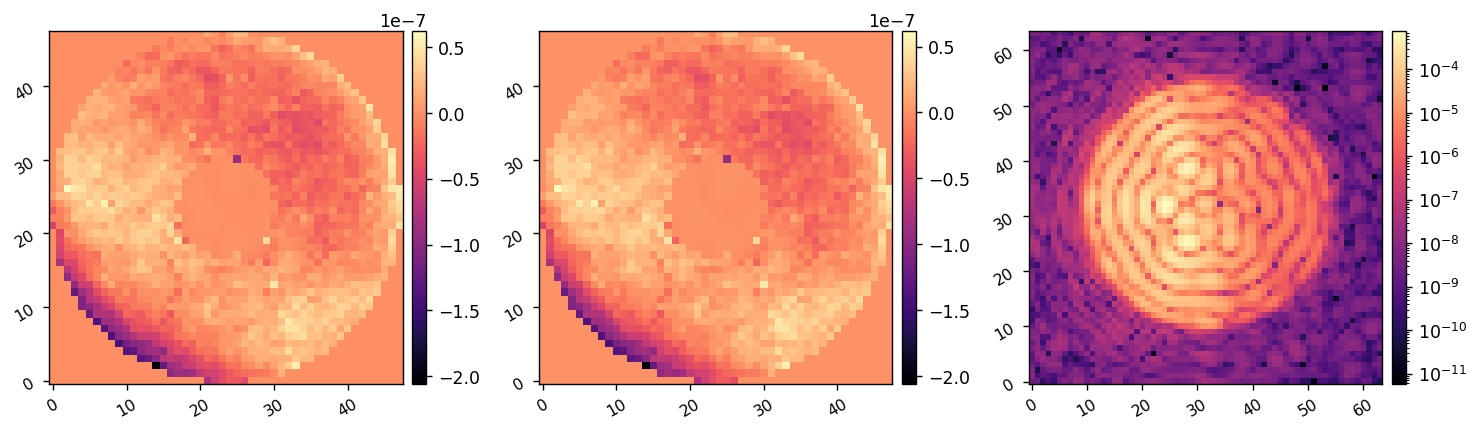

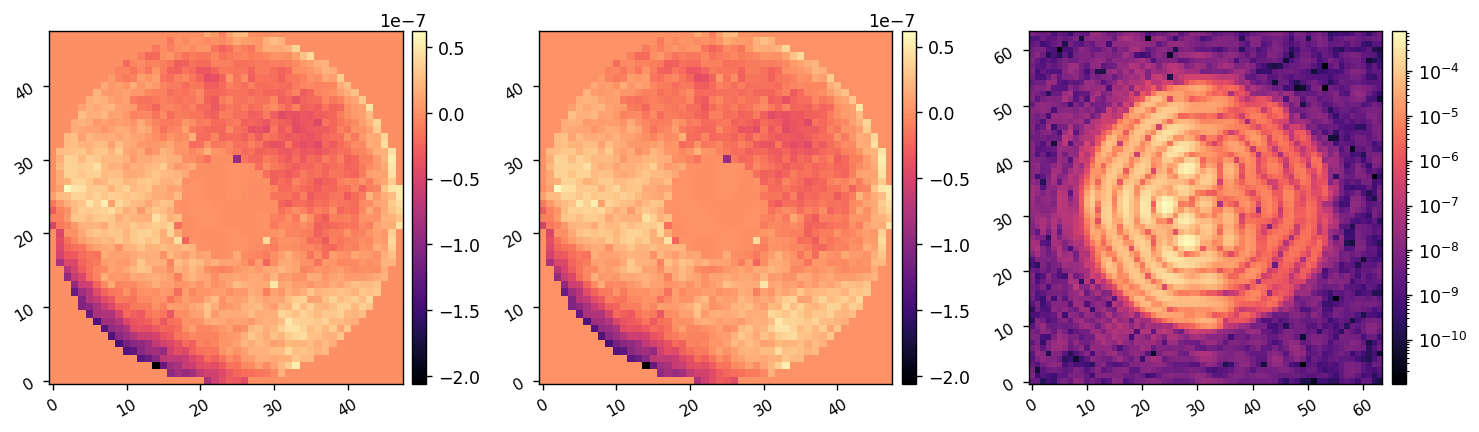

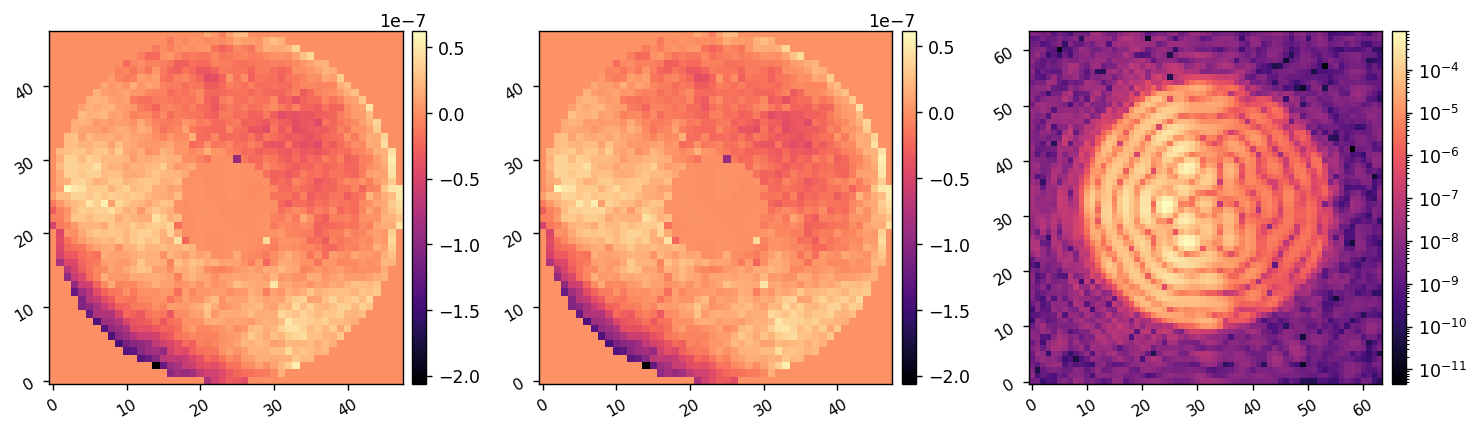

In [11]:
Ncalibs = 3
Nitr = 5

for i in range(Ncalibs):
    print('Calibrations {:d}/{:d}'.format(i+1, Ncalibs))
    response_cube = xp.array(fits.getdata(iefc_dir/'response-data'/'hlc_iefc_2dm_response_cube_{:d}_{:d}_20230619.fits'.format(i+1, Ncalibs)))
    images = xp.array(fits.getdata(iefc_dir/'images'/'hlc_iefc_2dm_images_{:d}_{:d}_20230619.fits'.format(i+1, Ncalibs)))
    dm1_commands = xp.array(fits.getdata(iefc_dir/'dm-commands'/'hlc_iefc_2dm_dm1_{:d}_{:d}_20230619.fits'.format(i+1, Ncalibs)))
    dm2_commands = xp.array(fits.getdata(iefc_dir/'dm-commands'/'hlc_iefc_2dm_dm2_{:d}_{:d}_20230619.fits'.format(i+1, Ncalibs)))
    
    for j in range(Nitr):
        wfsc.imshow3(dm1_commands[j], dm2_commands[j], images[j], lognorm3=True)
    